### 1. Exploratory Data Analysis (EDA) for the Bank_Transactions Dataset

This section contains the EDA for the `Bank_Transactions` dataset, which is the initial step of our AI assignment. The analysis includes data cleaning, handling missing values, and a variety of visualizations to uncover insights and patterns within the data. The visualizations cover distributions, correlations, and time-series analysis, which are critical to understand before applying any machine learning models.


### 1.1. Importing Libraries and Setting Up the Environment

The following code block is dedicated to importing necessary Python libraries that will be used throughout the Exploratory Data Analysis (EDA). 

- `pandas` for data manipulation and analysis.
- `os` for interacting with the operating system.
- `matplotlib.pyplot` for creating static, interactive, and animated visualizations in Python.
- `seaborn` for making attractive and informative statistical graphics.
- `datetime` for handling date and time data.

These libraries are foundational for conducting a thorough EDA and will be used for tasks ranging from data loading to visualization.


The following code imports necessary libraries and modules. These are essential for the various functions and methods used in the notebook.

Let's dive into this part: The following code imports necessary libraries and modules. Here's what we're doing next and why it's important...

In [9]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import datetime  
from scipy import stats
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

## 1.2. Setting the Directory and Loading the Dataset

This section covers the steps to set the working directory and load the `bank_transactions.csv` file into a DataFrame for analysis.

1. `path`: Specifies the path to the directory where the dataset is located.
2. `os.chdir`: Changes the current working directory to the specified path. This makes file access easier.
3. `os.listdir`: Lists the contents of the 'bank' directory to verify the presence of the dataset file.
4. `bank_path`: Joins the directory 'bank' with the file name to create a full file path.
5. `pd.read_csv`: Reads the CSV file into a pandas DataFrame named `bank_df`.
6. Displaying the first few rows of `bank_df` with `head()` to get an initial glimpse of the data structure.

This step is crucial as it lays the foundation for the entire EDA by ensuring that the dataset is correctly loaded and ready for analysis.


In [10]:
os.getcwd()

'/Users/owenalberts/Downloads'

In [11]:
os.listdir(os.path.join('bank'))# independent of the platform (unix, windows)

['modified_bank_transactions.csv', 'bank_transactions.csv', 'India cities.csv']

This code is responsible for loading the dataset. It uses pandas' `read_csv` or `read_excel` function to read the data file into a DataFrame.

In [12]:
bank_transaction_path = os.path.join("bank", "bank_transactions.csv")
bank_df_Original = pd.read_csv(bank_transaction_path, sep=',')

## 1.3. Data Cleaning and Preparation: Handling 'CustomerDOB' and 'CustomerID'

Identifying and Handling Unique 'CustomerID' Values:

We began by determining the uniqueness of the 'CustomerID' column. This involved counting the number of unique customer IDs to understand data diversity and customer representation.
To ensure each record in the dataset represents a unique customer, we removed duplicate entries based on 'CustomerID'. This step was crucial for preventing data redundancy and ensuring the accuracy of subsequent analyses.
Exploring 'CustomerDOB' Uniqueness:

Similar to 'CustomerID', we analyzed the 'CustomerDOB' (Customer Date of Birth) column to ascertain the count of unique dates. This gave us insights into the dataset's diversity regarding customer ages.
We also examined the unique values in the 'CustomerDOB' column. This step was significant for understanding the range and distribution of customer ages in the dataset.
Data Cleaning and Preliminary Analysis:

The focus on 'CustomerID' and 'CustomerDOB' was a preliminary step in the data cleaning process. We sought to understand the dataset's structure and the uniqueness of critical identifiers.
By cleaning and analyzing these columns, we laid the groundwork for more detailed and specific data analysis, such as calculating customer age, segmenting customers, or understanding demographic distributions.


In [13]:
# Assuming bank_df is your DataFrame and 'CustomerID' is the column name
unique_customer_ids_count = bank_df_Original['CustomerID'].nunique()
 
# Print the number of unique CustomerIDs
print("Number of unique CustomerIDs:", unique_customer_ids_count)


Number of unique CustomerIDs: 884265


In [14]:
# Keep only the first occurrence of each unique CustomerID
bank_df_Original = bank_df_Original.drop_duplicates(subset='CustomerID', keep='first')

# Verify the changes
print("Original DataFrame size:", len(bank_df_Original))
print("DataFrame size after removing non-unique CustomerIDs:", len(bank_df_Original))


Original DataFrame size: 884265
DataFrame size after removing non-unique CustomerIDs: 884265


In [15]:
# Count unique values
unique_customer_ids_count = bank_df_Original['CustomerID'].nunique()
unique_customer_dobs_count = bank_df_Original['CustomerDOB'].nunique()

# Print the number of unique values
print("Number of unique CustomerIDs:", unique_customer_ids_count)
print("Number of unique Customer DOBs:", unique_customer_dobs_count)

# Optional: Display the unique values

print("Unique CustomerIDs:", bank_df_Original['CustomerID'].unique())
print("Unique Customer DOBs:", bank_df_Original['CustomerDOB'].unique())


Number of unique CustomerIDs: 884265
Number of unique Customer DOBs: 17019
Unique CustomerIDs: ['C5841053' 'C2142763' 'C4417068' ... 'C8020229' 'C6459278' 'C6420483']
Unique Customer DOBs: ['10/1/94' '4/4/57' '26/11/96' ... '18/7/65' '15/5/42' '24/10/44']


## 1.4. Data Cleaning and Preparation: Handling 'CustomerDOB' and Age Calculation

In this step, we focus on cleaning and preparing the 'CustomerDOB' (Customer Date of Birth) column and calculating the age of the customers.

1. **Converting 'CustomerDOB' to Datetime**: The 'CustomerDOB' column is converted into a Python datetime object for easier manipulation. Any errors in conversion are coerced into NaT (Not a Time) values.

2. **Creating a Function to Adjust Future Dates**: 
    - A custom function `adjust_year` is defined to handle dates that are incorrectly in the future (e.g., 20xx instead of 19xx).
    - If the year is greater than 2023, the function subtracts 100 years to correct the date.

3. **Applying the Year Adjustment**: 
    - The `adjust_year` function is applied to each date in 'CustomerDOB'. 
    - This step corrects any erroneous future dates in the dataset.

4. **Calculating Age**: 
    - The age of each customer is calculated based on the adjusted date of birth ('AdjustedDOB').
    - The calculation considers the year, month, and day to determine the accurate age as of December 1, 2023.
    - If 'AdjustedDOB' is null, the age is set to None.

This data preparation step is essential for ensuring that subsequent analyses involving customer age are accurate and meaningful.


In [16]:
# Convert 'CustomerDOB' to datetime, handling errors
bank_df_Original['CustomerDOB'] = pd.to_datetime(bank_df_Original['CustomerDOB'], errors='coerce')

# Function to calculate age from DOB
def calculate_age(dob):
    try:
         dob = datetime.strptime(dob.strftime('%d/%m/%y'), '%d/%m/%y')
         if dob.year > 2023:
            dob = dob.replace(year=dob.year - 100)
         return (datetime.now() - dob).days // 365
    except:
        return np.nan

# Function to calculate age
bank_df_Original['Age'] = bank_df_Original['CustomerDOB'].apply(calculate_age)
 
# Remove rows with age greater than 100
bank_df_Original = bank_df_Original[bank_df_Original['Age'] <= 100]

# Conversion rate from INR to Euro
conversion_rate = 0.011 
# Convert 'TransactionAmount (INR)' to Euro
bank_df_Original['TransactionAmount (Euro)'] = bank_df_Original['TransactionAmount (INR)'] * conversion_rate

# Filling missing values
# Replace missing categorical data with 'Unknown' to maintain data integrity for analysis.
bank_df_Original['CustGender'].fillna('Unknown', inplace=True)
bank_df_Original['CustLocation'].fillna('Unknown', inplace=True)

# Replace missing numerical data with the median to minimize the impact of outliers.
bank_df_Original['CustAccountBalance'].fillna(bank_df_Original['CustAccountBalance'].mean(), inplace=True)

/var/folders/r7/wflk5s9j1jx0y8082yq0zqs40000gn/T/ipykernel_26219/2105760512.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  bank_df_Original['CustomerDOB'] = pd.to_datetime(bank_df_Original['CustomerDOB'], errors='coerce')


In [9]:
bank_df_Original['TransactionAmount (Euro)']

0            0.2750
1          307.9890
2            5.0490
3           22.6600
4           19.3875
             ...   
1048560     33.0000
1048561     16.5000
1048562      8.7890
1048563      5.0600
1048565     11.0000
Name: TransactionAmount (Euro), Length: 881431, dtype: float64

## 1.4. Initial Data Exploration

This section involves performing initial exploratory steps on the `bank_df_Original` DataFrame to understand its structure and identify any immediate data quality issues.

1. **Displaying Basic Information**:
   - Using `bank_df_Original.info()` to print the summary information of the dataset. This includes the number of entries, the total number of columns, each column's data type, and the number of non-null entries.

2. **Checking for Missing Values**:
   - Calling `bank_df_Original.isnull().sum()` to identify the number of missing values in each column. This is crucial for planning any data cleaning or imputation strategies.

3. **Displaying Basic Statistical Details**:
   - Using `bank_df_Original.describe()` to display basic statistical details like percentile, mean, standard deviation, etc., for numerical columns. This provides an overview of the distribution and central tendency of the data.

These steps are fundamental in any data analysis process as they provide a preliminary understanding of the dataset's nature and structure, guiding further analysis and modeling.


In [17]:
# Printing dataset
print("Basic Information of Dataset:")
print(bank_df_Original.info())

# Checking for missing values
print("\nMissing Values in Each Column:")
print(bank_df_Original.isnull().sum())

# Displaying basic statistical details
print("\nBasic Statistical Details:")
print(bank_df_Original.describe())

Basic Information of Dataset:
<class 'pandas.core.frame.DataFrame'>
Index: 881431 entries, 0 to 1048565
Data columns (total 11 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   TransactionID             881431 non-null  object        
 1   CustomerID                881431 non-null  object        
 2   CustomerDOB               881431 non-null  datetime64[ns]
 3   CustGender                881431 non-null  object        
 4   CustLocation              881431 non-null  object        
 5   CustAccountBalance        881431 non-null  float64       
 6   TransactionDate           881431 non-null  object        
 7   TransactionTime           881431 non-null  int64         
 8   TransactionAmount (INR)   881431 non-null  float64       
 9   Age                       881431 non-null  float64       
 10  TransactionAmount (Euro)  881431 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64

## 1.5. Comprehensive Data Visualization

In this chapter, we're stepping up our data exploration with a comprehensive visualization using Seaborn and Matplotlib. Our goal is to gain deeper insights into the `bank_df_Original` DataFrame through various types of plots. Each plot is tailored to reveal specific aspects of the dataset.

1. **Setting Up the Plotting Environment**:
   - We begin by importing Seaborn and Matplotlib, essential libraries for data visualization. A 3x3 subplot grid is prepared using `plt.subplots`, setting the stage for our nine distinct visualizations.

2. **Plot 1.5.1: Distribution of Transaction Amounts**:
   - Using `sns.histplot`, we create a histogram to analyze the distribution of transaction amounts in euros. This plot, enhanced with KDE (Kernel Density Estimate), provides insight into the frequency distribution of transaction values.

3. **Plot 1.5.2: Transaction Amounts by Gender**:
   - A violin plot, created with `sns.violinplot`, compares transaction amounts across customer genders. This visualization helps in understanding gender-based transaction patterns.

4. **Plot 1.5.3: Distribution of Account Balances**:
   - Another histogram focuses on customer account balances, revealing the distribution pattern and highlighting data density.

5. **Plot 1.5.4: Age Distribution of Customers**:
   - Here, we examine the age distribution among the bank's customers using a histogram, offering insights into the demographic spread.

6. **Plot 1.5.5: Top 10 Customer Locations**:
   - A bar plot shows the top 10 customer locations. This visualization helps in identifying the bank's major customer bases.

7. **Plot 1.5.6: Account Balance vs. Transaction Amount**:
   - A scatterplot is used to explore the relationship between account balances and transaction amounts, with a hue based on customer gender.

8. **Plot 1.5.7: Distribution of Transaction Time**:
   - This histogram sheds light on the distribution of transaction times, potentially revealing peak transaction periods.

9. **Plot 1.5.8: Gender Distribution**:
   - A count plot provides a simple yet effective overview of the gender distribution among the bank's customers.

10. **Plot 1.5.9: Correlation Heatmap**:
    - The chapter concludes with a heatmap displaying correlations among numerical features. This is crucial for understanding interrelationships between different variables.

Each plot is meticulously titled and labeled for clarity. Finally, `plt.tight_layout()` is used for optimal spacing, and `plt.show()` displays our comprehensive visualization grid. This visual analysis is pivotal in uncovering trends, patterns, and anomalies within the bank's transaction data.


/var/folders/r7/wflk5s9j1jx0y8082yq0zqs40000gn/T/ipykernel_26219/3794883877.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=bank_df_Original, x='CustGender', y='TransactionAmount (Euro)', palette='Set2', ax=axs[0, 1])
/var/folders/r7/wflk5s9j1jx0y8082yq0zqs40000gn/T/ipykernel_26219/3794883877.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_locations.index, y=top_locations.values, palette='viridis', ax=axs[1, 1])
/var/folders/r7/wflk5s9j1jx0y8082yq0zqs40000gn/T/ipykernel_26219/3794883877.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same e

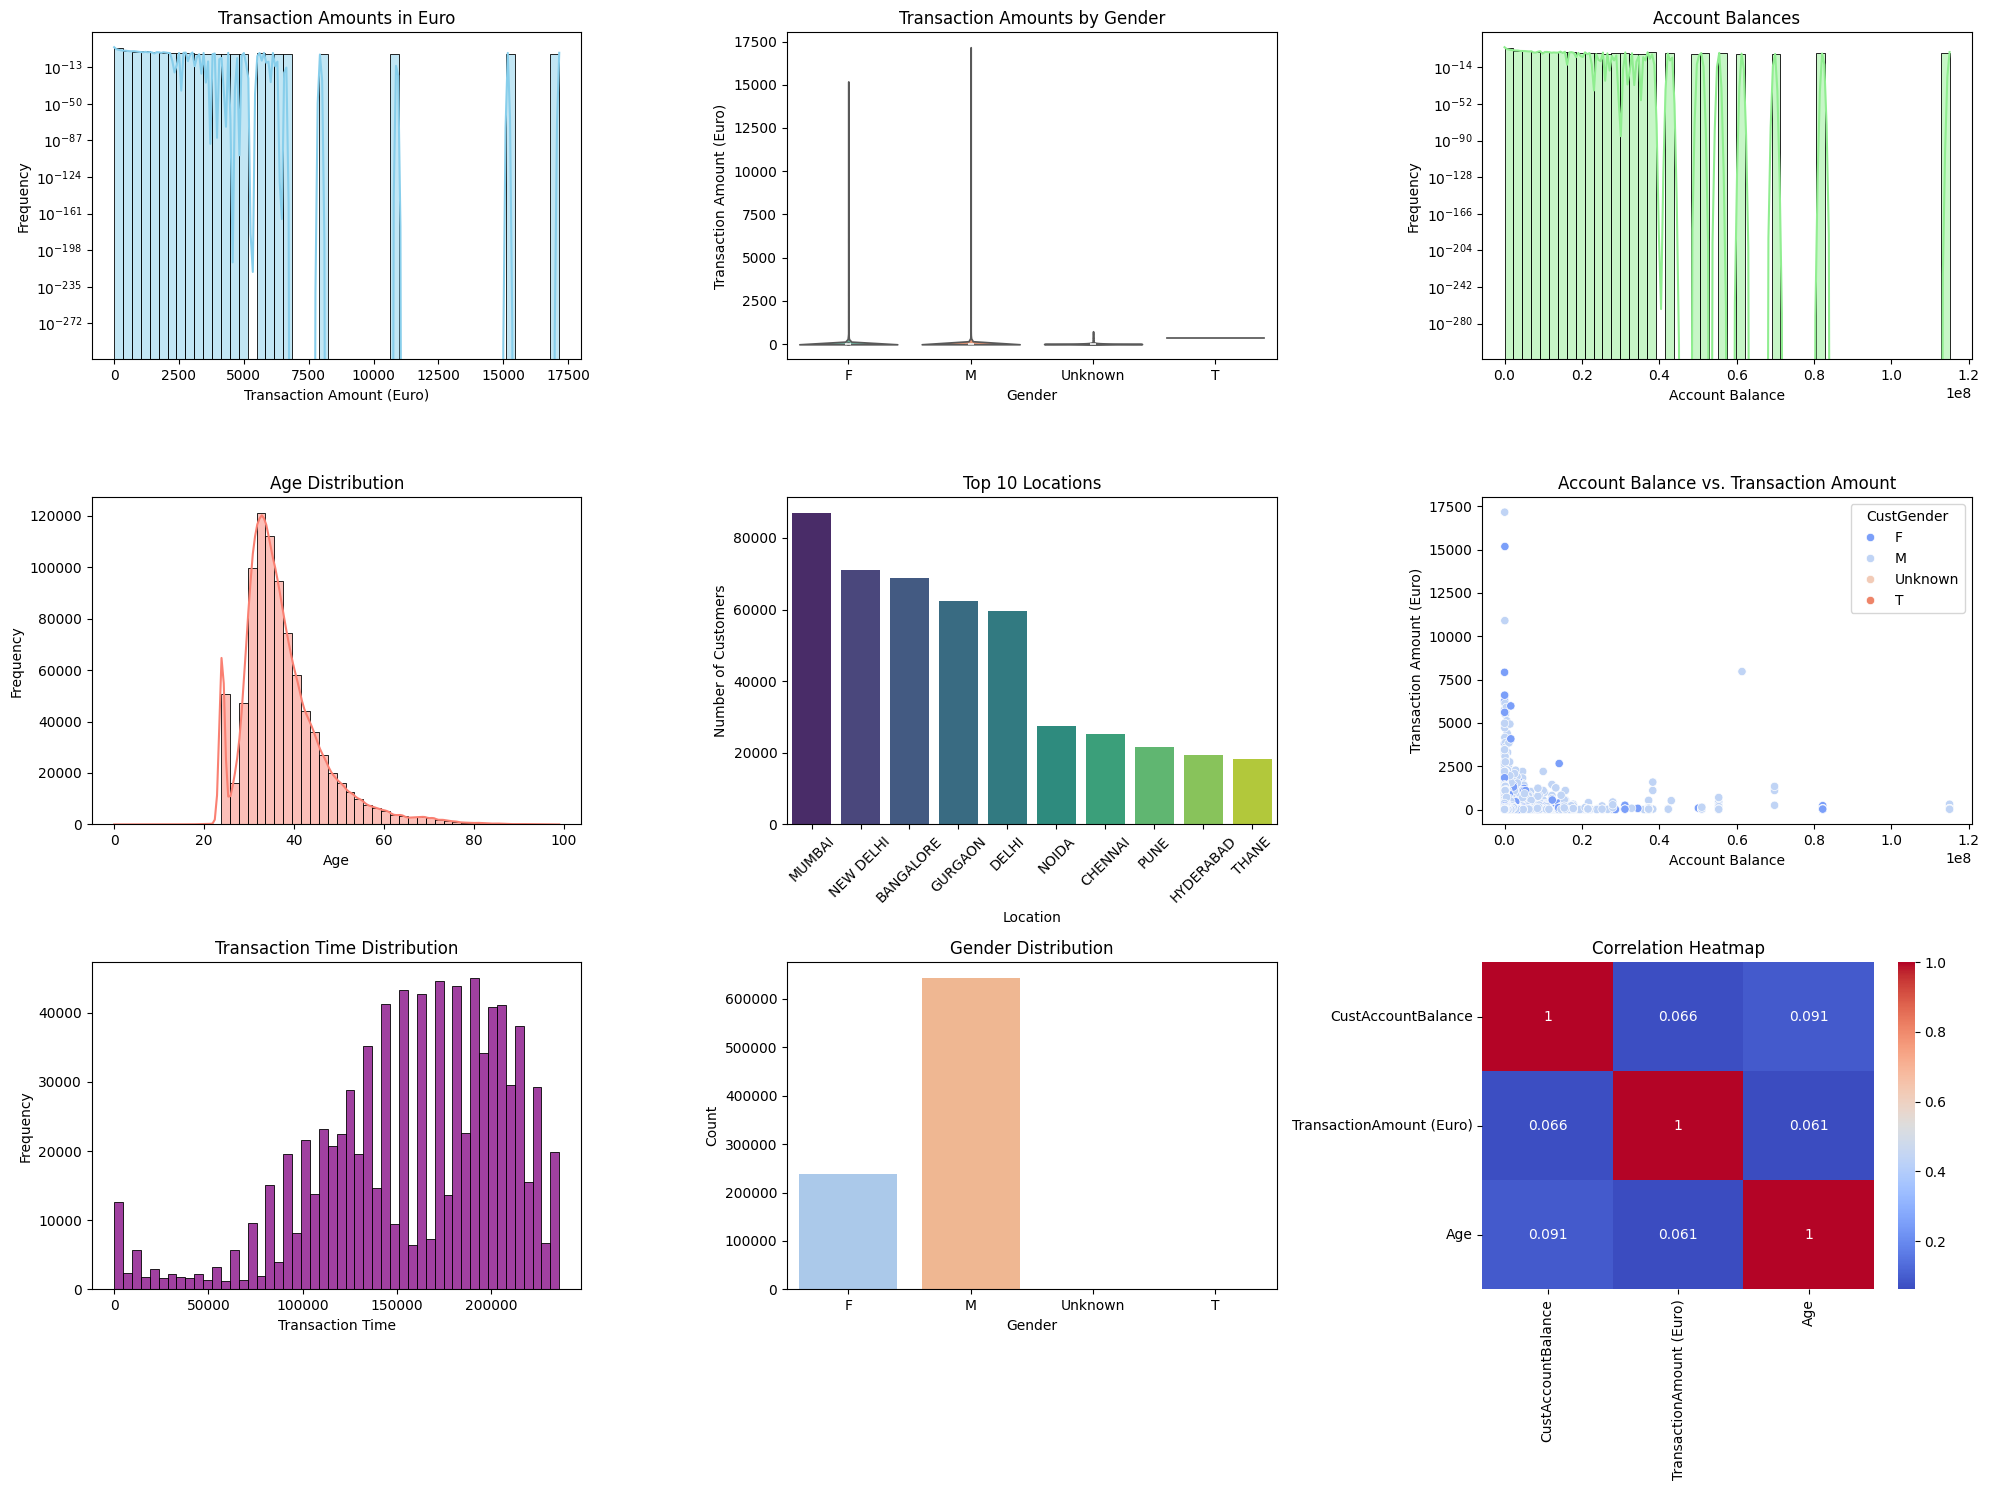

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

#Enhanced Data Visualization with Nine Different Plots
fig, axs = plt.subplots(3, 3, figsize=(20, 15))  # 3x3 subplot grid

# Plot 1: Distribution of Transaction Amounts in Euro
sns.histplot(bank_df_Original['TransactionAmount (Euro)'], bins=50, kde=True, color='skyblue', ax=axs[0, 0])
axs[0, 0].set_title('Transaction Amounts in Euro')
axs[0, 0].set_xlabel('Transaction Amount (Euro)')
axs[0, 0].set_ylabel('Frequency')
axs[0, 0].set_yscale('log')

# Plot 2: Violin Plot of Transaction Amounts by Gender
sns.violinplot(data=bank_df_Original, x='CustGender', y='TransactionAmount (Euro)', palette='Set2', ax=axs[0, 1])
axs[0, 1].set_title('Transaction Amounts by Gender')
axs[0, 1].set_xlabel('Gender')
axs[0, 1].set_ylabel('Transaction Amount (Euro)')

# Plot 3: Distribution of Account Balances
sns.histplot(bank_df_Original['CustAccountBalance'], bins=50, kde=True, color='lightgreen', ax=axs[0, 2])
axs[0, 2].set_title('Account Balances')
axs[0, 2].set_xlabel('Account Balance')
axs[0, 2].set_ylabel('Frequency')
axs[0, 2].set_yscale('log')

# Plot 4: Age Distribution of Customers
sns.histplot(bank_df_Original['Age'].dropna(), bins=50, kde=True, color='salmon', ax=axs[1, 0])
axs[1, 0].set_title('Age Distribution')
axs[1, 0].set_xlabel('Age')
axs[1, 0].set_ylabel('Frequency')
 
# Plot 5: Top 10 Customer Locations
top_locations = bank_df_Original['CustLocation'].value_counts().head(10)
sns.barplot(x=top_locations.index, y=top_locations.values, palette='viridis', ax=axs[1, 1])
axs[1, 1].set_title('Top 10 Locations')
axs[1, 1].set_xlabel('Location')
axs[1, 1].set_ylabel('Number of Customers')
axs[1, 1].tick_params(axis='x', rotation=45)

# Plot 6: Scatterplot of Account Balance vs. Transaction Amount
sns.scatterplot(data=bank_df_Original, x='CustAccountBalance', y='TransactionAmount (Euro)', hue='CustGender', palette='coolwarm', ax=axs[1, 2])
axs[1, 2].set_title('Account Balance vs. Transaction Amount')
axs[1, 2].set_xlabel('Account Balance')
axs[1, 2].set_ylabel('Transaction Amount (Euro)')

# Plot 7: Distribution of Transaction Time
sns.histplot(bank_df_Original['TransactionTime'], bins=50, color='purple', ax=axs[2, 0])
axs[2, 0].set_title('Transaction Time Distribution')
axs[2, 0].set_xlabel('Transaction Time')
axs[2, 0].set_ylabel('Frequency')
# 
# Plot 8: Gender Distribution
sns.countplot(x='CustGender', data=bank_df_Original, palette='pastel', ax=axs[2, 1])
axs[2, 1].set_title('Gender Distribution')
axs[2, 1].set_xlabel('Gender')
axs[2, 1].set_ylabel('Count')

# Plot 9: Heatmap of Correlations Among Numerical Features
corr = bank_df_Original[['CustAccountBalance', 'TransactionAmount (Euro)', 'Age']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', ax=axs[2, 2])
axs[2, 2].set_title('Correlation Heatmap')

# Adjust layout for readability
plt.tight_layout()
plt.show()

### 1.5.10. Summary of Visualizations

This concludes our in-depth visual exploration of `bank_df_Original`. In this chapter, we've covered a wide range of plots, each revealing unique insights into different facets of the data:

- **Histograms** offered us a look at distributions of variables like transaction amounts, account balances, and customer ages.
- **Violin and bar plots** provided comparative views, such as transaction amounts by gender and the distribution of customers across top locations.
- **Scatterplots and heatmaps** helped us understand relationships between variables and uncover underlying patterns.

The use of diverse plots not only enriches our understanding of the dataset but also prepares us for more advanced analyses. With these visual insights, we're better equipped to delve into further data modeling and hypothesis testing.

As a final step, `plt.tight_layout()` ensures that our plots are neatly arranged without overlapping, and `plt.show()` executes the display of our comprehensive visualization grid. These visualizations serve as a foundation for the analytical narratives we'll explore in the following chapters.


CustAccountBalance          0
TransactionAmount (Euro)    0
Age                         0
dtype: int64
CustAccountBalance          float64
TransactionAmount (Euro)    float64
Age                         float64
dtype: object
                          CustAccountBalance  TransactionAmount (Euro)  \
CustAccountBalance                  1.000000                  0.066288   
TransactionAmount (Euro)            0.066288                  1.000000   
Age                                 0.091244                  0.061073   

                               Age  
CustAccountBalance        0.091244  
TransactionAmount (Euro)  0.061073  
Age                       1.000000  


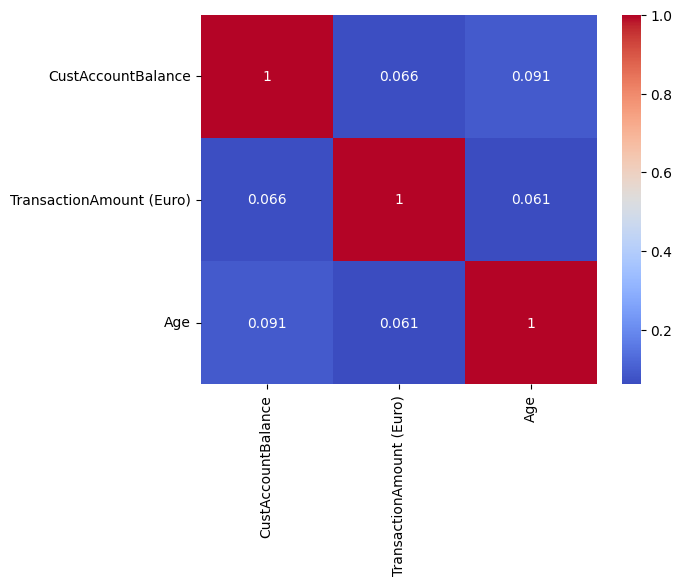

In [19]:
# Check for NaN values in the DataFrame
print(bank_df_Original[['CustAccountBalance', 'TransactionAmount (Euro)', 'Age']].isnull().sum())
 
# Check data types
print(bank_df_Original[['CustAccountBalance', 'TransactionAmount (Euro)', 'Age']].dtypes)

# Calculate the correlation matrix and print it
corr = bank_df_Original[['CustAccountBalance', 'TransactionAmount (Euro)', 'Age']].corr()
print(corr)

# If the above steps are fine, try plotting again
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()


## 1.6. Additional Analysis Steps

This section delves deeper into the `bank_df_Original` dataset to conduct more advanced analyses, enhancing our understanding of the data's characteristics and relationships.

### 1.6.1 Advanced Statistical Analysis
In this part, we demonstrate an example of advanced statistical testing through a T-test, which compares the transaction amounts between male and female customers. This test is crucial for determining if there are statistically significant differences between these two gender groups. The results, including the T-statistic and P-value, are computed to provide insights into gender-based spending patterns.

### 1.6.2 Enhanced Visualization - Scatter Plot with Regression Line
We employ a scatter plot with a regression line to explore the relationship between 'CustAccountBalance' and 'TransactionAmount (Euro)'. This visualization helps in understanding the correlation between these two variables. The regression line offers a visual representation of the potential linear relationship and its strength between account balance and transaction amount.

### 1.6.3 Categorical Analysis
This step involves a categorical analysis to compare the distribution of transaction amounts across different customer locations. A boxen plot is used for this purpose, providing a more detailed view of the data distribution than a standard box plot. This type of plot is particularly useful for large datasets and can reveal variations in transaction behaviors across different locations.

### 1.6.4 Outlier Analysis
We conduct an outlier analysis on the 'TransactionAmount (Euro)' feature using the Interquartile Range (IQR) method. The process includes:

- Identifying outliers based on IQR.
- Computing and displaying the number of outliers detected.
- Analyzing the characteristics of these outlier transactions through a statistical summary.

Understanding the outliers is essential for making informed decisions on data treatment and gaining insights into unusual transaction patterns within the dataset.

These additional steps in the EDA process provide a more comprehensive and nuanced understanding of the dataset, revealing deeper insights that guide further data processing and analysis.


The code here displays the first few or last few rows of the DataFrame, giving a quick overview of the data structure and contents.

T-Statistic for Gender-Based Transaction Amounts: -5.955044157571149
P-value for Gender-Based Transaction Amounts: 2.6009964422531807e-09


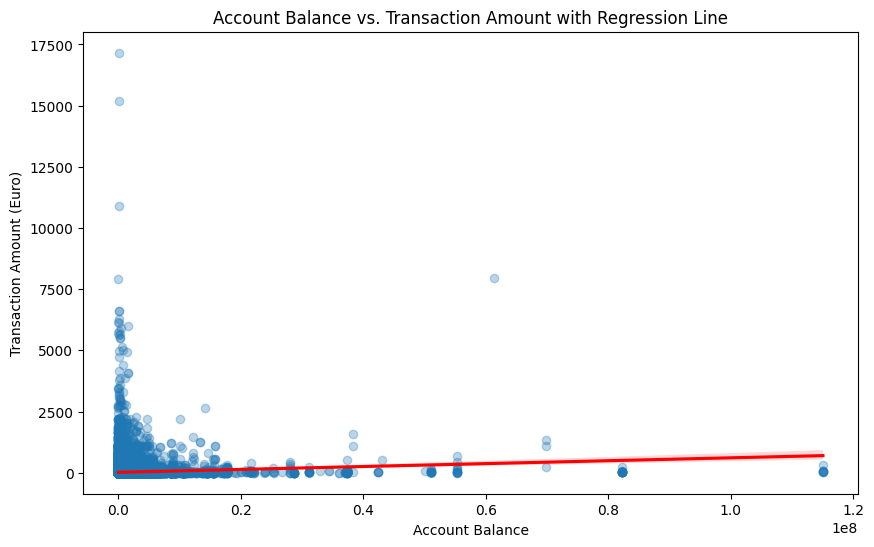

<Figure size 1200x600 with 0 Axes>

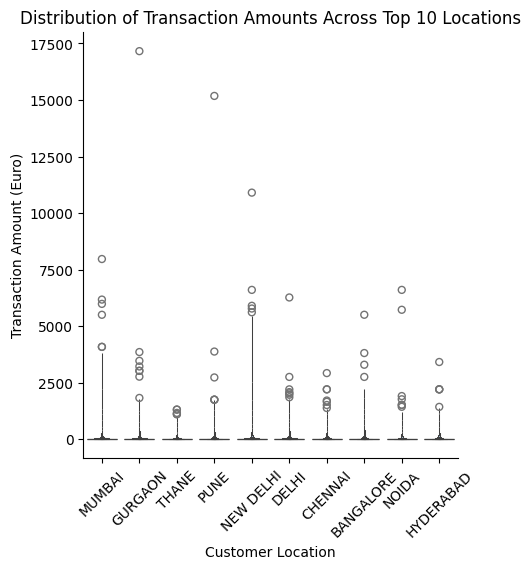

Number of Outliers in Transaction Amounts: 93739
Statistical Summary of Outlier Transactions:
                          CustomerDOB  CustAccountBalance  TransactionTime  \
count                          93739        9.373900e+04     93739.000000   
mean   1978-07-16 10:49:20.603377440        2.838383e+05    159814.225050   
min              1800-01-01 00:00:00        0.000000e+00         0.000000   
25%              1980-02-01 00:00:00        1.149844e+04    132650.500000   
50%              1986-11-08 00:00:00        4.348012e+04    164937.000000   
75%              1992-08-09 00:00:00        1.582604e+05    194345.000000   
max              2073-12-31 00:00:00        1.150355e+08    235959.000000   
std                              NaN        1.745049e+06     46846.748035   

       TransactionAmount (INR)           Age  TransactionAmount (Euro)  
count             9.373900e+04  93739.000000              93739.000000  
mean              9.728389e+03     40.025059                107.0

In [20]:
# Revised Additional Analysis Steps

# 1.6.1 Advanced Statistical Analysis
# T-test to compare means of Transaction Amounts between two genders
male_transactions = bank_df_Original[bank_df_Original['CustGender'] == 'M']['TransactionAmount (Euro)']
female_transactions = bank_df_Original[bank_df_Original['CustGender'] == 'F']['TransactionAmount (Euro)']
 
t_stat, p_value = stats.ttest_ind(male_transactions, female_transactions, nan_policy='omit')
print("T-Statistic for Gender-Based Transaction Amounts:", t_stat)
print("P-value for Gender-Based Transaction Amounts:", p_value)

# 1.6.2 Enhanced Visualization - Scatter Plot with Regression Line
# Example: Relationship between Account Balance and Transaction Amount
plt.figure(figsize=(10, 6))
sns.regplot(x='CustAccountBalance', y='TransactionAmount (Euro)', data=bank_df_Original, scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
plt.title('Account Balance vs. Transaction Amount with Regression Line')
plt.xlabel('Account Balance')
plt.ylabel('Transaction Amount (Euro)')
plt.show()

# 1.6.3 Categorical Analysis
# Example: Distribution of Transaction Amounts across different Locations
top_10_locations = bank_df_Original['CustLocation'].value_counts().head(10).index

# Filter the dataset to include only transactions from these top 10 locations
top_10_locations_df = bank_df_Original[bank_df_Original['CustLocation'].isin(top_10_locations)]

# Visualization of Transaction Amounts for the Top 10 Locations
plt.figure(figsize=(12, 6))
sns.catplot(x='CustLocation', y='TransactionAmount (Euro)', kind='boxen', data=top_10_locations_df)
plt.title('Distribution of Transaction Amounts Across Top 10 Locations')
plt.xlabel('Customer Location')
plt.xticks(rotation=45)
plt.ylabel('Transaction Amount (Euro)')
plt.show()

# 1.6.4 Outlier Analysis
# Identifying outliers in 'TransactionAmount (Euro)'
Q1 = bank_df_Original['TransactionAmount (Euro)'].quantile(0.25)
Q3 = bank_df_Original['TransactionAmount (Euro)'].quantile(0.75)
IQR = Q3 - Q1
outliers = bank_df_Original[bank_df_Original['TransactionAmount (Euro)'] > (Q3 + 1.5 * IQR)]
print("Number of Outliers in Transaction Amounts:", outliers.shape[0])

# Analyzing Characteristics of Outlier Transactions
outlier_analysis = outliers.describe()
print("Statistical Summary of Outlier Transactions:\n", outlier_analysis)


## 1.7. Additional Analysis Steps

In this section, we delve into the visualization and geographical analysis of the `bank_transactions` dataset, with a particular focus on the Indian cities. Our goal is to enhance the understanding of the spatial distribution of customers and their transaction behaviors.

### 1.7.1 Geographical Distribution Analysis
We utilize Geopandas to plot the geographical distribution of customer transactions across India. This allows us to visually assess the concentration of customer activities and identify regions with higher transaction volumes.

### 1.7.2 Enhanced Visualization - Geospatial Plotting
A geospatial plot is employed to display customer locations, with marker sizes proportional to the number of transactions at each location. This visualization helps in understanding the correlation between geographical location and transaction volume. The plot includes:
- Normalized markers for transaction volume.
- A color gradient to represent the number of transactions.
- Zoomed-in view focusing on India for better clarity.

### 1.7.3 Top Cities Labeling
We enhance the geospatial plot by adding labels to the top cities based on the number of transactions. This step involves:
- Identifying the top cities with the highest transaction counts.
- Annotating these cities on the map for easy identification.
- Customizing the plot to maintain readability and visual appeal.

### 1.7.4 Data Aggregation and Mapping
The data is aggregated by coordinates to count the number of transactions per location. We then map these aggregated counts to a geospatial plot of India, allowing us to visualize the data in the context of actual geographical locations.

### 1.7.5 Outlier Analysis in Geospatial Context
In addition to plotting transaction volumes, we conduct an outlier analysis to detect and visualize exceptionally high transaction volumes within the geospatial context. This analysis includes:
- Calculating the Interquartile Range (IQR) for transaction volumes.
- Identifying and plotting outliers with distinct markers.
- Providing insights into the geographical distribution of these outliers.

Through these steps, we gain a deeper understanding of the geographical trends and outliers in the transaction data, providing valuable insights that can inform business strategies and operational priorities.


## 1.7. Additional Analysis Steps

In this section, we delve into the visualization and geographical analysis of the `bank_transactions` dataset, with a particular focus on the Indian cities. Our goal is to enhance the understanding of the spatial distribution of customers and their transaction behaviors.

This code is responsible for loading the dataset. It uses pandas' `read_csv` or `read_excel` function to read the data file into a DataFrame.

In [21]:
os.getcwd()

'/Users/owenalberts/Downloads'

In [22]:
os.listdir(os.path.join('bank'))# independent of the platform (unix, windows)

['modified_bank_transactions.csv', 'bank_transactions.csv', 'India cities.csv']

In [23]:
indian_cities_path = os.path.join("bank", "India cities.csv")
indian_cities = pd.read_csv(indian_cities_path, sep=',')

### 1.7.1 Geographical Distribution Analysis - Data Preparation

A crucial step is preparing the location data for accurate mapping. This segment focuses on cleaning and standardizing the `CustLocation` field in the `bank_df_Original` DataFrame, ensuring that our geospatial analysis is based on reliable data.

- **Extracting Known City Names**: 
   - We start by creating a list of known Indian cities from the `indian_cities` DataFrame. This list will serve as a reference for recognizing valid city names in our dataset.

- **Defining the Cleaning Function**: 
   - The `clean_location` function is designed to streamline the location data. It checks each entry in the `CustLocation` column and matches it against our list of known cities.
   - If the location string contains a known city, the function returns that city name, ensuring consistency in city naming.
   - In cases where the location isn't a string (like NaN or other types), it's returned as-is, preserving the original data structure.

- **Applying the Cleaning Process**: 
   - We apply this cleaning function to each entry in the `CustLocation` column of `bank_df_Original`. This process helps in homogenizing the location data, which is pivotal for accurate geographical plotting.

In [24]:
# Extracting city names from the indiancities DataFrame
known_cities = indian_cities['city'].tolist()

# Define the clean_location function
def clean_location(location, known_cities):
    if not isinstance(location, str):  # Check if the location is a string
        return location  # If not, return as is (could be NaN or other types)
    for city in known_cities:
        if city in location:
            return city
    return location  # Or 'Unknown' if you want to label unrecognized patterns

# Clean the 'CustLocation' column
bank_df_Original['CustLocation'] = bank_df_Original['CustLocation'].apply(lambda x: clean_location(x, known_cities))

# Check the cleaning
print(bank_df_Original['CustLocation'].head(5))


0     JAMSHEDPUR
1        JHAJJAR
2         MUMBAI
3         MUMBAI
4    NAVI MUMBAI
Name: CustLocation, dtype: object


### 1.7.2 Data Quality Assessment for Geospatial Analysis

Before we proceed with the enhanced geospatial visualization, it's crucial to assess the quality of our location data in `bank_df_Original`. This ensures that our visualizations are built on accurate and complete data.

- **Checking for Missing Values**: 
   - We first examine `CustLocation` for any missing values. Understanding the extent of missing data is vital as it can significantly impact the accuracy and reliability of our geospatial analysis.

- **Understanding the Diversity of Locations**: 
   - To get a better grasp of the data's diversity, we check the number of unique locations present in `CustLocation`. This gives us an idea of the geographical spread of the data we're working with.


In [25]:
# Check for missing values
print("Missing values:", bank_df_Original['CustLocation'].isnull().sum())

print("Unique locations:", bank_df_Original['CustLocation'].nunique())

# View a sample of unique locations
print(bank_df_Original['CustLocation'].dropna().unique()[:5])


Missing values: 0
Unique locations: 8971
['JAMSHEDPUR' 'JHAJJAR' 'MUMBAI' 'NAVI MUMBAI' 'ITANAGAR']


### 1.7.3 Data Standardization and Integration for Enhanced Geospatial Analysis

This section focuses on further refining our data to support the effective labeling of top cities and accurate data aggregation for mapping. Our aim is to enhance the geospatial plot with detailed and precise information.

- **Previewing City Data from `indian_cities`**:
   - We start by displaying a sample of unique city names from the `indian_cities` dataset. This step is crucial to understand the format and diversity of city names we'll be integrating into our main dataset.

- **Standardizing Location Text Format**:
   - To maintain consistency, we convert all entries in the `CustLocation` column of `bank_df_Original` to title case. This standardization ensures uniformity in text format, aiding in accurate data matching and visualization.

- **Merging Datasets for Enhanced Analysis**:
   - The `bank_df_Original` dataset is merged with the `indian_cities` dataset. This is done by matching the `CustLocation` column from `bank_df_Original` with the `city` column from `indian_cities`.
   - This merge enriches our main dataset with additional geographical details, facilitating a more comprehensive geospatial analysis.

- **Cleaning Merged Data**:
   - Post-merging, we optionally remove the redundant `city` column from `indian_cities` to declutter our dataset.
   - We also identify and drop additional columns like `admin_name`, `iso2`, `capital`, `population`, and `population_proper` that are not required for our analysis. This step simplifies our dataset, focusing on the most relevant information for our geospatial plotting.



In [26]:
print(indian_cities['city'].dropna().unique()[:5])

['Delhi' 'Mumbai' 'Kolkāta' 'Bangalore' 'Chennai']


In [27]:
# Example: Standardize the text format (e.g., title case)
bank_df_Original['CustLocation'] = bank_df_Original['CustLocation'].str.title()

In [28]:
# Merge the datasets
#'CustLocation' in bank_transactions is matched with 'city' in indiancities
bank_df_Original = pd.merge(bank_df_Original, indian_cities, left_on='CustLocation', right_on='city', how='left')

# Optionally, if you don't want to keep the 'city' column from indiancities, you can drop it
bank_df_Original = bank_df_Original.drop(columns=['city'])

### 1.7.4 Preparing for Geospatial Plotting

With the data now standardized and enriched with necessary geographical details, we're set to proceed with the geospatial plotting. This preparation paves the way for effectively aggregating data by coordinates, counting the number of transactions per location, and visually mapping these counts to a geospatial plot of India. Such meticulous data preparation is instrumental in visualizing the data in the context of actual geographical locations, enhancing our understanding of spatial transaction trends.

In [29]:
# List the columns you want to drop
columns_to_drop = ['admin_name', 'iso2', 'capital', 'population', 'population_proper']  # Replace with the names of the columns you want to drop

# Drop the columns
bank_df_Original = bank_df_Original.drop(columns=columns_to_drop)

In [30]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the data with latitude and longitude
# Load a world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Create a GeoDataFrame for customer locations
gdf = gpd.GeoDataFrame(bank_df_Original, geometry=gpd.points_from_xy(bank_df_Original['lng'], bank_df_Original['lat']))


/var/folders/r7/wflk5s9j1jx0y8082yq0zqs40000gn/T/ipykernel_26219/1860800628.py:6: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


### 1.7.5 Detailed Geospatial Visualization of Customer Transactions

In our pursuit to unravel the spatial patterns of customer transactions, we employ advanced geospatial plotting techniques that not only illustrate the distribution but also the relative transaction volumes per location.

- **Geopandas for Geographical Mapping**: 
   - We use Geopandas to load a world map and overlay our data, focusing on India. This provides us with a geographical context for our analysis.

- **Aggregating Transaction Data**:
   - The transaction data is aggregated by longitude and latitude, and we calculate the number of transactions at each location, providing us with a clear count to base our visualization on.

- **Marker Size Normalization**:
   - We normalize the marker sizes to represent transaction volumes visually, allowing for immediate visual interpretation of high and low transaction areas.

- **Merging Location Names**:
   - City names from our dataset are merged with the aggregated data. This step ensures that each point on the map is labeled with the corresponding city name, making our visualization informative.

- **Top Locations Labeling**:
   - The most active transaction locations are labeled on the map, highlighting areas of particular interest. We select the top locations to label based on the transaction count, drawing attention to regions with the highest customer activity.

- **Customizing the Geospatial Plot**:
   - The plot is customized to zoom into India, focusing on the region of interest. Longitude and latitude limits are set to frame the Indian subcontinent appropriately.

- **Enhancing Readability with a Colorbar**:
   - A colorbar is integrated as a legend to interpret the transaction volume, with colors ranging from light to dark blue, corresponding to the transaction count.

The resulting visualization is a powerful representation of customer locations and transaction volumes. It serves as an analytical tool that informs us about the transaction density and helps in identifying regions that are significant for business strategies and operational decisions.

This map not only aids in the visual assessment of transaction distribution but also acts as a foundational element for outlier analysis and further geographical trend studies.


/var/folders/r7/wflk5s9j1jx0y8082yq0zqs40000gn/T/ipykernel_26219/435734408.py:5: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


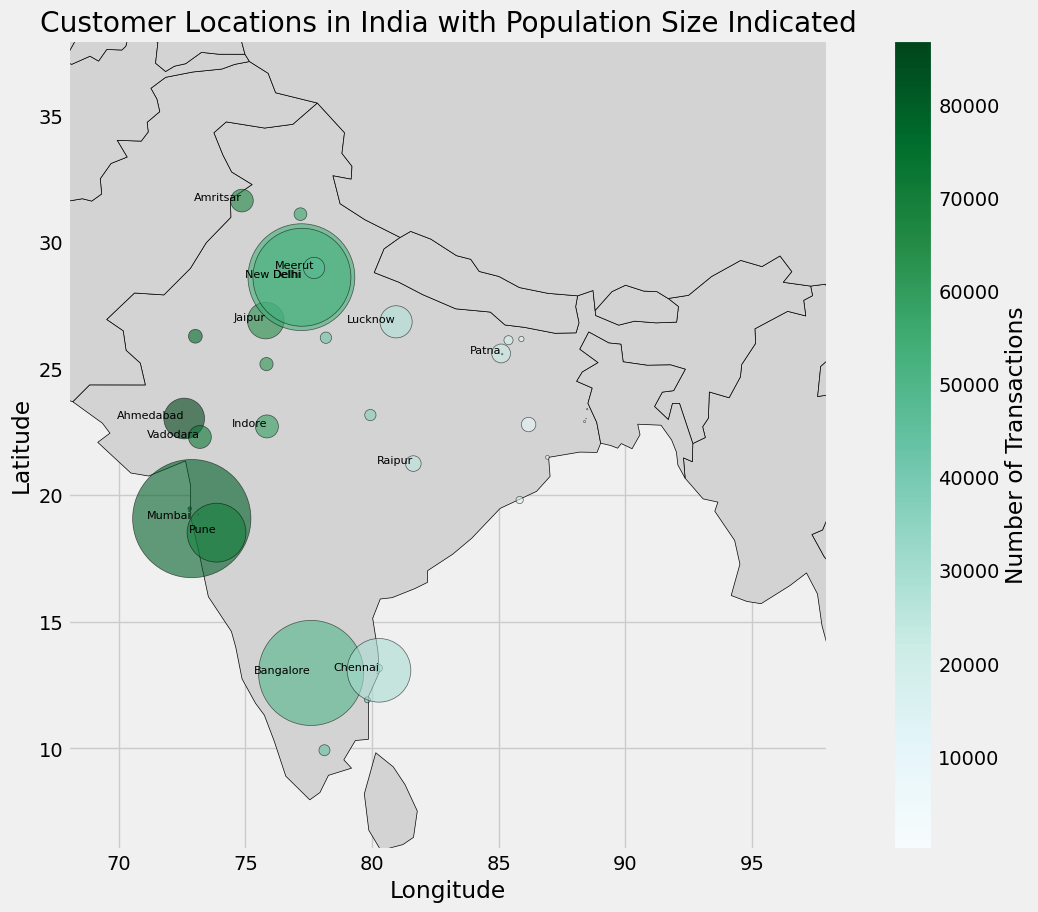

In [42]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load a world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Aggregate data to count the number of occurrences per location
location_counts = bank_df_Original.groupby(['lng', 'lat']).size().reset_index(name='count')

# Normalize the size of the markers
scale_factor = 12  
location_counts['markersize'] = location_counts['count'] / scale_factor

# Join the city names from bank_transactions to the aggregated data
# This assumes that the bank_transactions dataframe has a 'city' column with city names
agg_with_names = location_counts.merge(bank_df_Original[['lng', 'lat', 'CustLocation']].drop_duplicates(), on=['lng', 'lat'], how='left')

# Create a GeoDataFrame for the aggregated data
gdf_aggregated = gpd.GeoDataFrame(agg_with_names, geometry=gpd.points_from_xy(agg_with_names['lng'], agg_with_names['lat']))

# Plotting
fig, ax = plt.subplots(figsize=(15, 10))
world.plot(ax=ax, color='lightgray', edgecolor='black')
#gdf_aggregated.plot(ax=ax, markersize=gdf_aggregated['markersize'], cmap='gist_stern', alpha=0.6, edgecolor='k', linewidth=0.5)
gdf_aggregated.plot(ax=ax, markersize=gdf_aggregated['markersize'], cmap='BuGn_r', alpha=0.6, edgecolor='k', linewidth=0.5)


# The number of top locations 
top_n = 15  # You can adjust this number as needed

# Find the top N locations by count
top_locations = gdf_aggregated.nlargest(top_n, 'count')

# Add labels for top N locations
for idx, row in top_locations.iterrows():
     ax.text(row['geometry'].x, row['geometry'].y, row['CustLocation'], fontsize=8, ha='right')

# Zoom into India
ax.set_xlim(68, 98)  # Longitude limits for India
ax.set_ylim(6, 38)  # Latitude limits for India

plt.title('Customer Locations in India with Population Size Indicated')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap='BuGn', norm=plt.Normalize(vmin=location_counts['count'].min(), vmax=location_counts['count'].max()))
sm._A = []  # Create an empty array for the data range
cbar = fig.colorbar(sm, ax=ax)
cbar.set_label('Number of Transactions')

plt.show()


### 1.7.6 Visual Exploration of Customer Locations and Transaction Patterns

As we delve deeper into the bank's transaction data, we employ visual analytics to extract insights into customer demographics and transaction behaviors.

- **Top Customer Locations**:
   - We use a count plot to display the most common customer locations within our dataset. The visualization ranks the top 10 locations by the number of customers, offering clarity on where the bank's customer base is most concentrated.

- **Transaction Amount and Account Balance Correlation**:
   - A scatter plot is then used to explore the relationship between transaction amounts in euros and customer account balances. This visualization helps in identifying patterns and potential outliers in the data, such as exceptionally high transaction amounts or account balances.

- **Styling for Clarity**:
   - The plots are styled using the "fivethirtyeight" theme, known for its clean and clear visual appeal. This choice of styling ensures that the visualizations are not only informative but also aesthetically pleasing.

- **Titling for Context**:
   - Each plot is given a descriptive title, providing context and aiding in the interpretation of the visual data presented. Titles are formatted with a background color and font settings for enhanced readability.

These visualizations serve as a prelude to a more detailed outlier analysis. They provide a snapshot of the geographical distribution of customers and a preliminary understanding of the relationship between key numerical variables in the dataset. This approach to data exploration is instrumental in guiding further analysis and informing business decisions.



/var/folders/r7/wflk5s9j1jx0y8082yq0zqs40000gn/T/ipykernel_26219/398352509.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  chart = sns.countplot(y='CustLocation', data=bank_df_Original, palette='gist_stern', order=bank_df_Original['CustLocation'].value_counts()[:10].index)


Text(0.5, 1.0, 'Most 10 Location of Customer')

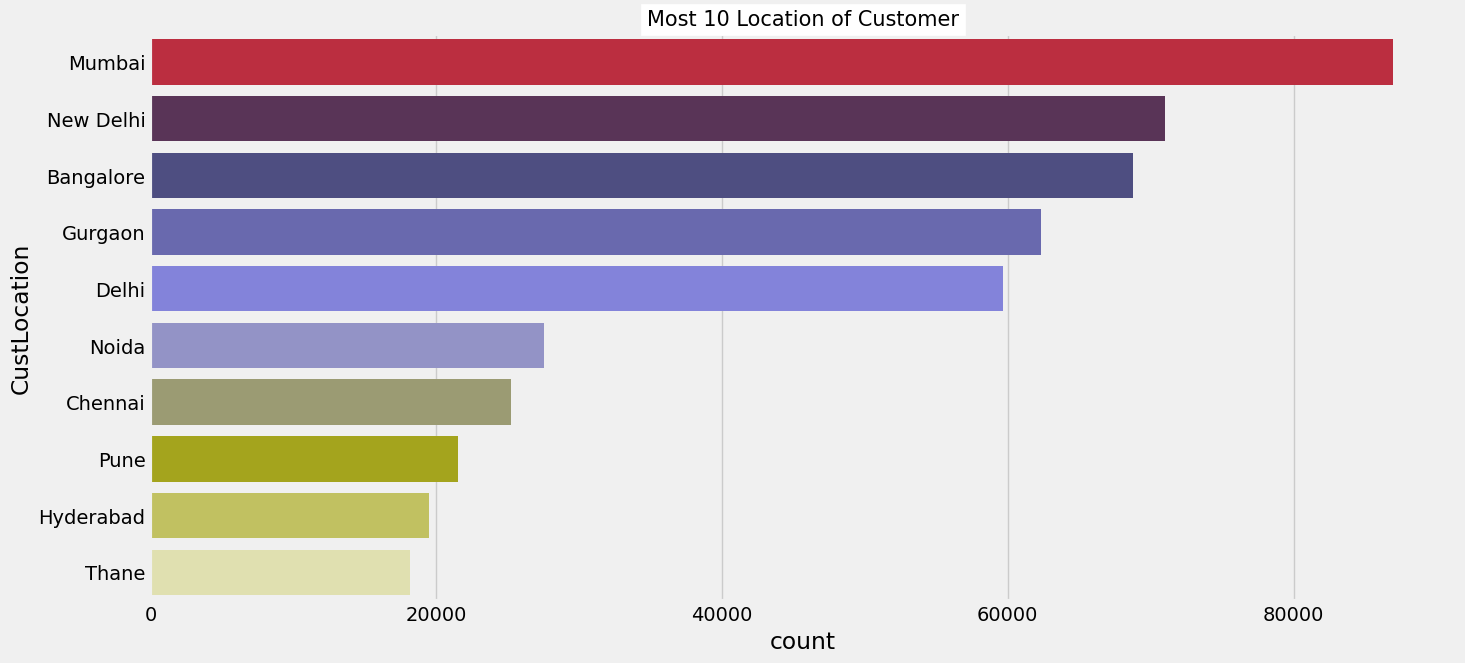

In [35]:
# Set the style of the plot to 'fivethirtyeight' for better aesthetics. 
plt.style.use("fivethirtyeight")

# Set the size of the figure for the upcoming plot to ensure that it is large enough to be clear and readable.
plt.figure(figsize=(15,7))

# Create a countplot to visualize the top 10 customer locations. The 'y' parameter is set to 'CustLocation' to plot on the vertical axis.
# 'palette' sets the color scheme to 'viridis'.
# 'order' parameter is set to display the locations in descending order of frequency.
chart = sns.countplot(y='CustLocation', data=bank_df_Original, palette='gist_stern', order=bank_df_Original['CustLocation'].value_counts()[:10].index)

# Set the title of the plot with a custom font size and background color.
plt.title("Most 10 Location of Customer",
          fontsize='15',
          backgroundcolor='white',
          color='black')


/var/folders/r7/wflk5s9j1jx0y8082yq0zqs40000gn/T/ipykernel_26219/1877796677.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='TransactionAmount (Euro)', y='CustAccountBalance', data=bank_df_Original, palette='viridis')


Text(0.5, 1.0, 'TransactionAmount (Euro) and CustAccountBalance')

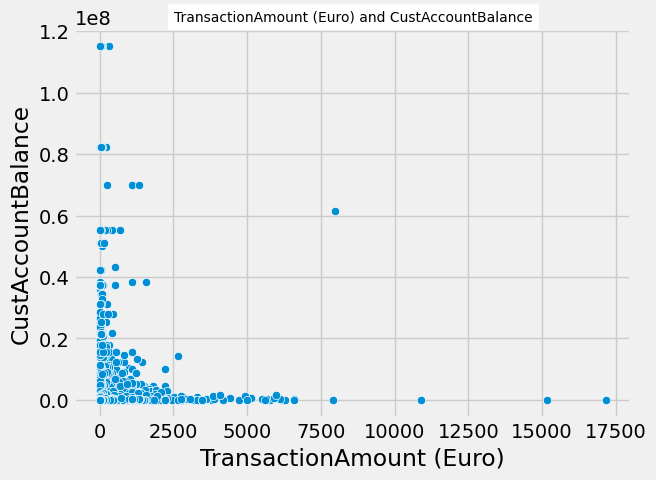

In [33]:
# Apply the "fivethirtyeight" style to all matplotlib plots.
plt.style.use("fivethirtyeight")

# Create a scatter plot with 'TransactionAmount (Euro)' on the x-axis and 'CustAccountBalance' on the y-axis
# The 'viridis' palette is used for color mapping. 
sns.scatterplot(x='TransactionAmount (Euro)', y='CustAccountBalance', data=bank_df_Original, palette='viridis')

# Add a title to the scatter plot, with a specific font size, background color, and font color for clarity
plt.title("TransactionAmount (Euro) and CustAccountBalance",
          fontsize='10',
          backgroundcolor='White',
          color='Black')


In [34]:
output_file_path = '/Users/owenalberts/Downloads/modified_bank_transactions.csv'  # Replace with the desired file path
 
# Save the DataFrame to a CSV file
bank_df_Original.to_csv(output_file_path, index=False)  # Set index=False to avoid writing row indices to the CSV file
 
print(f"File saved successfully to {output_file_path}")